# 52954 - Machine Learning and Statistics - Project

## Mark Kelly - 2019

This assessment concerns the Boston House Prices dataset and is broken up into 3 main sections:
- Describe
- Infer
- Predict

__Describe__: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset. This part is worth 20% of your overall mark.

__Infer__: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your ﬁndings within the notebook.

__Predict__: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

## Section 1 - Describe

In [2]:
import pandas as pd

In [17]:
from sklearn.datasets import load_boston
df_boston = load_boston()
import matplotlib.pyplot as plt

In [18]:
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

In [4]:
type(df_boston)

sklearn.utils.Bunch

In [8]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
df = pd.DataFrame(data=df_boston['data'], columns=df_boston['feature_names'])

In [14]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [21]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


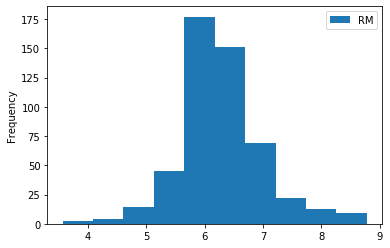

In [30]:
df.plot(kind='hist',y='RM')
plt.show()

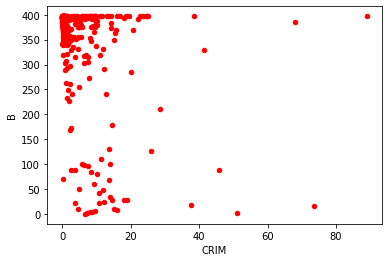

In [31]:
df.plot(kind='scatter',x='CRIM',y='B',color='red')
plt.show()

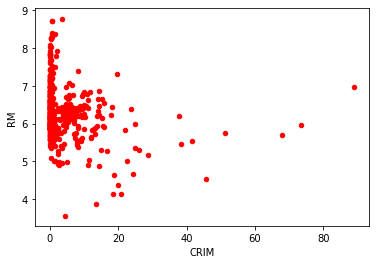

In [24]:
df.plot(kind='scatter',x='CRIM',y='RM',color='red')
plt.show()